# A Batalha dos "Underdogs": Análise de dados dos Pacers e do Thunder - Playoff NBA 2025

Sempre fui fascinado por basquete, em especial a NBA pelo nível técnico que os jogadores tem, a estética e também sempre achei interessante porque qualquer coisa que o jogador faça em quadra vira um número. Uma vez eu li que as estatísticas na NBA servem para formar a linguagem universal do basquete moderno e entender, no detalhe, a deficiência do seu time ou do porque ele ser tão bom.

Com isso nós conseguimos entender o porquê o Lebrom James é tão bom ou porque ele é tão diferente dos outros. Hoje o esporte profissional e moderno nos obriga a entender no detalhe os seus atletas e seus times, todos os movimentos das franquias precisam ser pensados e justificados, uma vez que um único contrato de jogador pode custar 288 milhões de reais, uma única temporada.

Pensando nisso eu criei uma forma de consumir esses dados que estão na internet e disponível pra todo mundo de graça, o melhor cenário pra isso vai ser a temporada 2025 da NBA onde 2 times que nunca foram campões da NBA chegaram até a final da temporada, Indiana Pacers e Oklahoma City Thunder.

Neste projeto, explorei os dados usando Web Scraping com PYTHON, PANDAS, SEABORRN e MATPLOTLIB para visualizações, para comparar algumas métricas, como por exemplo, a relação entre a eficiência de ataque e eficiência de defesa de cada jogador dos 2 times.

Pra que seja possível realizar a analise nós precisamos das estatísticas dos jogadores da temporada 2025, mais especificamente as estatísticas do playoff da temporada 2025, usamos o site 'Basketball Reference', nesse site nós podemos encontrar diversas estatísticas de diversas temporadas da NBA.


# Extração dos dados (Web Scraping)

## Importando os módulos

De início nós precisamos extrair os dados da web e escolher as bibliotecas que vamos utilizar pra isso, eu optei por usar as bibliotecas: cloudscraper pra fazer a requisição do link que vamos usar, BeautifulSoup pra fazer a extração dos dados e pandas pra criar alguns data frames no meio do projeto.

In [94]:
import cloudscraper
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Variáveis

Nesse trecho do código nós especificamos em uma variável a temporada que queremos extrair as estatísticas, isso nos ajuda a organizar o código, para utilizar o parâmetro ao longo do código e caso a gente queira extrair as estatísticas de outras temporadas a gente só precisa alterar esse parâmetro.

In [95]:
temporada = 2025

## Acessando a pagina com os dados
Nesse bloco tentamos acessar a página e retornar o status dela usando a biblioteca 'cloudscraper', a utilização dessa biblioteca foi necessária pra contornar a proteção do site, não consegui fazer o acesso usando a biblioteca 'requests'.

In [96]:
scraper = cloudscraper.create_scraper()

url = f"https://www.basketball-reference.com/leagues/NBA_{temporada}_totals.html"

resp = scraper.get(url)

resp.status_code

200

## Preparar conteudo HTML

Nesse trecho do código nós pegamos o texto em HTML do link e transformamos em uma estrutura que seja navegável pelo PYTHON e garantimos que os caracteres sejam exibidos de forma correta.

In [97]:
resp.encoding = 'utf-8'
soup = BeautifulSoup(resp.text, 'html.parser')

## Extrair dados de jogadores

Nesse trecho de código nós fazemos a extração dos dados dos jogadores a partir de onde esse dado se encontra dentro do HTML que nós tratamos.

In [98]:
# Pega os elementos do html que estão na tag 'tr'
linha = soup.findAll('tr')[1:]

# Primeiro criamos uma lista vazia para salvar as listas com as estatísticas de cada jogador
players_stats_full = []

for i in linha:
    # Criamos uma lista vazia para salvar de forma independente as estatísticas de cada jogador
    row_player_stats = []

    for j in i.findAll('td'): # Para cada elemento com a tag 'td' no html...
        row_player_stats.append(j.getText()) # ... salva dentro da lista individual do jogador

    players_stats_full.append(row_player_stats) # Uma vez que a lista de estatísticas do jogador seja criada nós salvamos na lista principal com todos os jogadores.


## Extraindo os campos das estatisticas

Nesse trecho do código nós extraímos o cabeçalho da tabela do HTML que contém os nomes de cada campo.

Dicionário de dados:

* Player: Nome do jogador
* Age: Idade do jogador
* Team: Equipe do jogador
* Pos: Posição em que o jogador joga
* G: Jogos que foram jogados
* GS: Quantidade de jogos que o jogador iniciou como titular
* MP: Minutos jogados
* FG: Quantidade de arremessos convertidos
* FGA: Quantidade de tentativas de arremesso 
* FG%: Porcentagem de arremessos convertidos
* 3P: Cestas de 3 pontos convertidas
* 3PA: Tentativa de cesta de 3 pontos
* 3P%: Porcentagem de cestas de 3 convertidas
* 2P: Quantidade de cestas de 2
* 2PA: Quantidade de tentativas de cesta de 2
* 2P%: Porcentagem de cestas de 2 convertidas
* eFG%: Porcentagem efetiva de FG - Essa estatística ajuda o fato que um FG de 3 pontos vale um ponto a mais do que um FG de 2 pontos
* FT: Lances livres
* FTA: Quantidade de tentativas de lance livre
* FT%: Porcentagem de lances livres convertidos
* ORB: Rebotes ofensivos
* DRB: Rebotes defensivos
* TRB: Total de rebotes
* AST: Assistências
* STL: Roubos de bola
* BLK: Bloqueio
* TOV: Turnovers
* PF: Faltas pessoais
* PTS: Pontos
* Trp-Dbl: Quantidade de triplo-duplo
* Awards: Prêmios

In [99]:
# Pegar os campos do cabeçalho da tabela
cabecalho = soup.findAll('tr', limit = 1)[0].findAll('th')

# Cria uma lista com cada campo do cabeçalho e desconsidera o primeiro
campos = [i.getText() for i in cabecalho][1:]

## Criação de data frame full

Nesse trecho de código nós juntamos os campos aos dados de cada jogador e criamos um data frame com todas as estatísticas dos jogadores, tanto da temporada regular como do playoff e em seguida eu crio um arquivo CSV com esses dados.

Observe que eu peço para desconsiderar jogadores que tem o nome 'League Average', isso não é um jogador e sim uma linha que fica ao final da tabela com estatística geral de todos os jogadores, eu não quero isso, se você quiser é só remover do código.

In [100]:
# Cria um data frame com as estatísticas de cada jogador da temporada regular e playoff, e cria um arquivo csv.
estatisticas = pd.DataFrame(players_stats_full, columns = campos)

estatisticas_temporada = estatisticas[estatisticas['Player'] != 'League Average']

estatisticas_temporada.head()

estatisticas_temporada.to_csv(f"arquivo_estatisticas_jogador_full_{temporada}.csv", index=False)

## Criação de data frames distintos de temporada regular e playoff

O arquivo do data frame criado full é composto de estatísticas de temporada regular e de playoff de cada jogador.

Desse modo foi necessário a divisão do data frame full em 2 distintos e o divisor foi uma linha vazia no meio do df.

Nesse ponto é importante fazer uma análise prévia no arquivo CSV que foi gerado a fim de encontrar alguma inconsistência e observando o arquivo eu pude perceber que na extração dos dados dos jogadores uma linha vazia ao final da tabela estava sendo retornada e isso será nosso pondo de divisão dos dados.

In [101]:
linhas_vazias = estatisticas_temporada[estatisticas_temporada.isnull().all(axis=1)]

if not linhas_vazias.empty:
    # Pegar o índice da primeira linha vazia
    primeira_linha_vazia = linhas_vazias.index[0]

    # Cria o primeiro data frame da linha vazia pra CIMA - a linha vazia (não quero a linha vazia no csv)
    df_temporada_regular = estatisticas_temporada.iloc[:primeira_linha_vazia - 1].copy()

    # Cria o segundo data frame da linha vazia pra BAIXO
    df_playoff = estatisticas_temporada.iloc[primeira_linha_vazia:].copy()

    print(f"Dividido na primeira linha vazia (índice {primeira_linha_vazia})")

df_temporada_regular.to_csv(f"arquivo_estatistica_jogador_regular_{temporada}.csv", index=False)
df_playoff.to_csv(f"arquivo_estatistica_jogador_playoff_{temporada}.csv", index=False)

Dividido na primeira linha vazia (índice 736)


# Análise - Indiana Pacers e Oklahoma City Thunder

## Carregar os dados

Primeiro nós fazemos a carga dos dados que criamos anteriormente e salvamos em CSV.

In [102]:
df_full = pd.read_csv(f"arquivo_estatistica_jogador_playoff_{temporada}.csv")
df_full.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards
0,Shai Gilgeous-Alexander,26,OKC,PG,23,23,851,233,504,0.462,...,100,123,150,38,20,60,65,688,0,Finals MVP-1
1,Jalen Brunson,28,NYK,PG,18,18,680,181,393,0.461,...,50,62,126,8,5,55,59,530,0,NaN
2,Jalen Williams,23,OKC,SG,23,23,796,178,396,0.449,...,103,127,111,32,9,41,50,492,0,NaN
3,Pascal Siakam,30,IND,PF,23,23,771,175,341,0.513,...,116,146,78,28,16,30,66,472,0,NaN
4,Tyrese Haliburton,24,IND,PG,23,23,772,146,315,0.463,...,116,123,197,30,15,53,39,399,1,NaN


## Definição de quais jogadores vão entrar na análise

Esse trecho de código serve para selecionar apenas os jogadores que possuem mais de 8 jogos jogados e que tenham mais de 1 ponto marcado.

**OBS:** Vale destacar que para fazer esse filtro eu utilizei todos os jogadores de todos os times que foram para o playoff de 2025.

In [103]:
min_jogos = 8
min_pontos = 0

df = df_full[(df_full['G'] >= min_jogos) & (df_full['PTS'] > min_pontos)].copy()

df.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards
0,Shai Gilgeous-Alexander,26,OKC,PG,23,23,851,233,504,0.462,...,100,123,150,38,20,60,65,688,0,Finals MVP-1
1,Jalen Brunson,28,NYK,PG,18,18,680,181,393,0.461,...,50,62,126,8,5,55,59,530,0,NaN
2,Jalen Williams,23,OKC,SG,23,23,796,178,396,0.449,...,103,127,111,32,9,41,50,492,0,NaN
3,Pascal Siakam,30,IND,PF,23,23,771,175,341,0.513,...,116,146,78,28,16,30,66,472,0,NaN
4,Tyrese Haliburton,24,IND,PG,23,23,772,146,315,0.463,...,116,123,197,30,15,53,39,399,1,NaN


## Métricas de ataque e defesa

Nesse trecho eu criei as métricas para dar valor ao ataque e defesa de cada jogador e cada campo tem o seu peso.

Como não existe um campo de estatística que dê valor ao poder de ataque e defesa do jogador essa técnica foi necessária.

*   Para dar valor ao 'ataque' eu usei os campos onde o peso estipulei em: 'PTS' = 1, 'AST' = 0.5 e 'ORB' = 0.3
*   Para dar valor a 'defesa' eu usei os campos onde o peso estipulei em: 'STL' = 1, 'BLK' = 1 e 'DRB' = 0.5



In [104]:
# Criar métricas de ataque e defesa
df['Ataque'] = df['PTS'] + (df['AST'] * 0.5) + (df['ORB'] * 0.3)
df['Defesa'] = df['STL'] + df['BLK'] + (df['DRB'] * 0.5)

# Normalizar por minutos jogados
df['Ataque_por_minuto'] = df['Ataque'] / df['MP']
df['Defesa_por_minuto'] = df['Defesa'] / df['MP']

## Criação do gráfico de dispersão


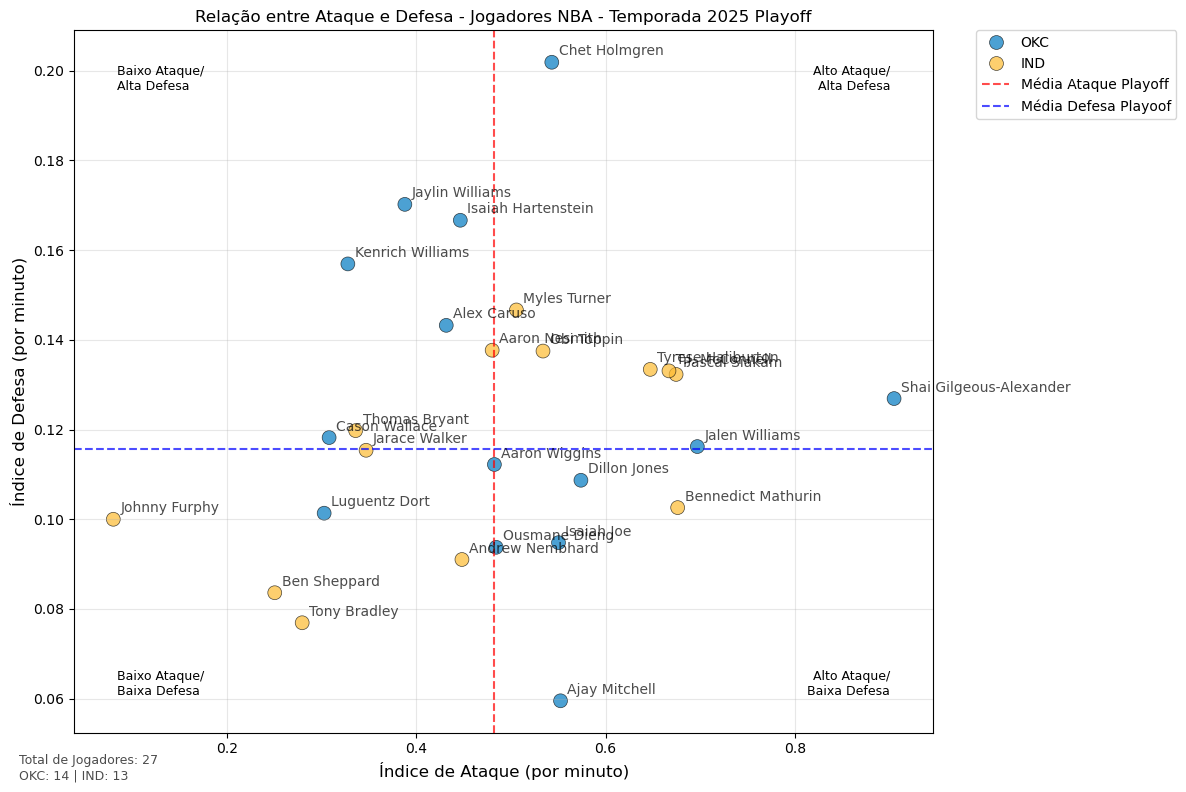

In [105]:
# Especifica o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Filtrar apenas os times OKC e IND para o scatterplot
df_filtrado = df[df['Team'].isin(['OKC', 'IND'])]

cores_personalizadas = {
    'OKC': '#007AC1',  # Azul do OKC Thunder
    'IND': '#FDBB30'   # Dourado do Indiana Pacers
}

# Criar o gráfico de dispersao colorido por time
grafico = sns.scatterplot(data=df_filtrado,
                         x='Ataque_por_minuto',
                         y='Defesa_por_minuto',
                         hue='Team',  # Cor por time
                         palette=cores_personalizadas,
                         alpha=0.7,
                         s=100,
                         edgecolor='black',
                         linewidth=0.5)

# Adicionar labels para 20 jogadores destacados por minutos jogados
for i, row in df_filtrado.nlargest(50, 'MP').iterrows():
    plt.annotate(row['Player'], # nome do jogador
                (row['Ataque_por_minuto'], row['Defesa_por_minuto']), # posicao que o nome vai ficar
                xytext=(5, 5), # Distancia do nome pro ponto
                textcoords='offset points',
                fontsize=10,
                alpha=0.7)

plt.xlabel('Índice de Ataque (por minuto)', fontsize=12) # Nome eixo X
plt.ylabel('Índice de Defesa (por minuto)', fontsize=12) # Nome eixo Y
plt.title(f'Relação entre Ataque e Defesa - Jogadores NBA - Temporada {temporada} Playoff') # Nome do gráfico
plt.grid(True, alpha=0.3) # Ativa a grade do grafico

# Adicionar linhas de média
plt.axvline(df['Ataque_por_minuto'].mean(), color='red', linestyle='--', alpha=0.7, label='Média Ataque Playoff')
plt.axhline(df['Defesa_por_minuto'].mean(), color='blue', linestyle='--', alpha=0.7, label='Média Defesa Playoof')

# Especificando os quadrantes
plt.text(0.95, 0.95, 'Alto Ataque/\nAlta Defesa', transform=plt.gca().transAxes, fontsize=9, ha='right', va='top')
plt.text(0.05, 0.95, 'Baixo Ataque/\nAlta Defesa', transform=plt.gca().transAxes, fontsize=9, ha='left', va='top')
plt.text(0.05, 0.05, 'Baixo Ataque/\nBaixa Defesa', transform=plt.gca().transAxes, fontsize=9, ha='left', va='bottom')
plt.text(0.95, 0.05, 'Alto Ataque/\nBaixa Defesa', transform=plt.gca().transAxes, fontsize=9, ha='right', va='bottom')

# Ajustar a legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)

# Totais
stats_text = f"Total de Jogadores: {len(df_filtrado)}\nOKC: {len(df_filtrado[df_filtrado['Team']=='OKC'])} | IND: {len(df_filtrado[df_filtrado['Team']=='IND'])}"
plt.figtext(0.02, 0.02, stats_text, fontsize=9, alpha=0.7)

plt.tight_layout()
plt.show()

## Análise a respeito do gráfico de dispersão

### Descrição Geral do Gráfico
* O gráfico é um diagrama de dispersão (scatter plot) com:

* Eixo X: Índice de Ataque por minuto;

* Eixo Y: Índice de Defesa por minuto;

* Cada ponto representa um jogador, identificado pelo nome;

* Linhas de média para ataque em vermelho e defesa em azul.

### Observações Principais

Shai Gilgeous-Alexander (Finals MVP):

* Destaque claro no gráfico: maior média de ataque e defesa entre todos.

* Perfil completo: ofensivo e defensivo, mas sendo mais ofensivo.

Top 3 jogadores mais defensivos:

* Isaiah Hartenstein, Jaylin Williams e Chet Holmgren.

Top 3 jogadores mais ofensivos:

* Shai Gilgeous-Alexander, Jalen Williams e Paskal Siakam.

Top 3 pé de rato:

* Johnny Furphy, Ben Sheppard e Tony Bradley.

* Os três são os mais próximos da origem do gráfico e dentre os jogadores analisados eles tem as piores estatisticas.

### Conclusões:

A equipe Oklahoma City Thunder tem um núcleo forte ofensivo com Shai Gilgeous-Alexander, Jalen Williams e o top 3 defensivos, tornando um time muito equilibrado e matador.

Com isso o Shai Gilgeous-Alexander é o líder absoluto da equipe em contribuição geral e foi eleito o MVP da final.

Não é à toa que o Oklahoma City Thunder foi o campeão da temporada 2025 da NBA.


---
Estou precisando de emprego quem tiver uma vaga de analista de dados jr. fala comigo (cicero.alcantara17@gmail.com) amo vocês <3